In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path

# Plot defaults
plt.rcParams["figure.figsize"] = (8, 4)
plt.rcParams["axes.grid"] = True

DATA_PROCESSED = Path("../data/processed")

# If you used CSV:
df = pd.read_csv(DATA_PROCESSED / "city_day_merged.csv", parse_dates=["Date"])

# If you kept Parquet instead, use this line instead of read_csv:
# df = pd.read_parquet(DATA_PROCESSED / "city_day_merged.parquet")

df.head()


,City,State,Date,AccidentCount,AverageSeverity,MaxSeverity,HighSeverityFlag,Temperature,Precipitation,Is_Holiday,Year,Month,DayOfWeek,is_weekend,Season,is_rainy,AccidentCount_lag1,AccidentCount_7d_ma
0,Charlotte,NC,2016-06-21,23,2.0,2,0,NaN,NaN,0,2016,6,1,0,Summer,0,NaN,23.000000
1,Charlotte,NC,2016-06-22,42,2.0,2,0,NaN,NaN,0,2016,6,2,0,Summer,0,23.0,32.500000
2,Charlotte,NC,2016-06-23,35,2.0,2,0,NaN,NaN,0,2016,6,3,0,Summer,0,42.0,33.333333
3,Charlotte,NC,2016-06-24,17,2.0,2,0,NaN,NaN,0,2016,6,4,0,Summer,0,35.0,29.250000
4,Charlotte,NC,2016-06-25,1,3.0,3,1,NaN,NaN,0,2016,6,5,1,Summer,0,17.0,23.600000


In [9]:

df.info()
df.describe(include="all").T
# Missingness profile
df.isna().mean().sort_values(ascending=False).head(20)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5525 entries, 0 to 5524
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   City                 5525 non-null   object        
 1   State                5525 non-null   object        
 2   Date                 5525 non-null   datetime64[ns]
 3   AccidentCount        5525 non-null   int64         
 4   AverageSeverity      5525 non-null   float64       
 5   MaxSeverity          5525 non-null   int64         
 6   HighSeverityFlag     5525 non-null   int64         
 7   Temperature          0 non-null      float64       
 8   Precipitation        0 non-null      float64       
 9   Is_Holiday           5525 non-null   int64         
 10  Year                 5525 non-null   int64         
 11  Month                5525 non-null   int64         
 12  DayOfWeek            5525 non-null   int64         
 13  is_weekend           5525 non-nul

Temperature            1.00000
Precipitation          1.00000
AccidentCount_lag1     0.00181
City                   0.00000
Year                   0.00000
is_rainy               0.00000
Season                 0.00000
is_weekend             0.00000
DayOfWeek              0.00000
Month                  0.00000
Is_Holiday             0.00000
State                  0.00000
HighSeverityFlag       0.00000
MaxSeverity            0.00000
AverageSeverity        0.00000
AccidentCount          0.00000
Date                   0.00000
AccidentCount_7d_ma    0.00000
dtype: float64

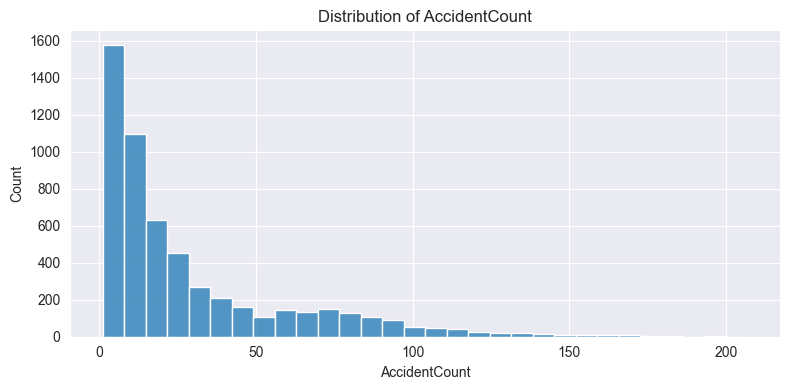

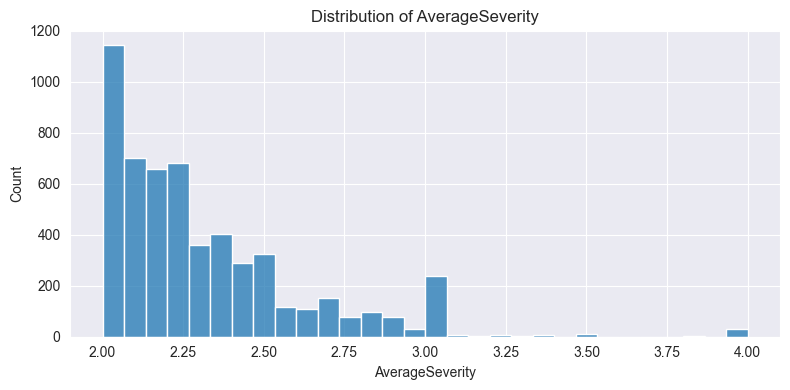

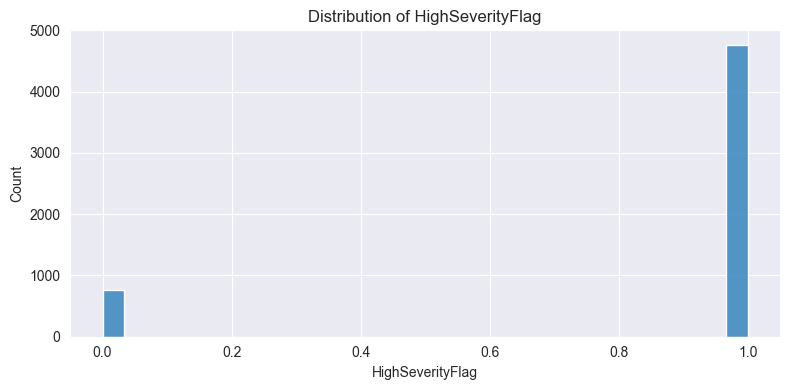

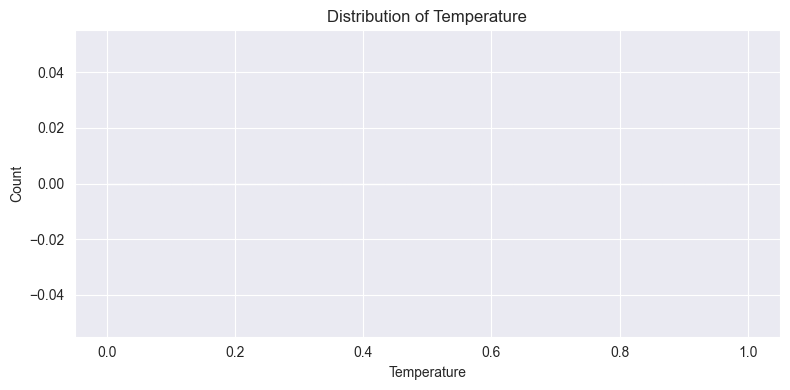

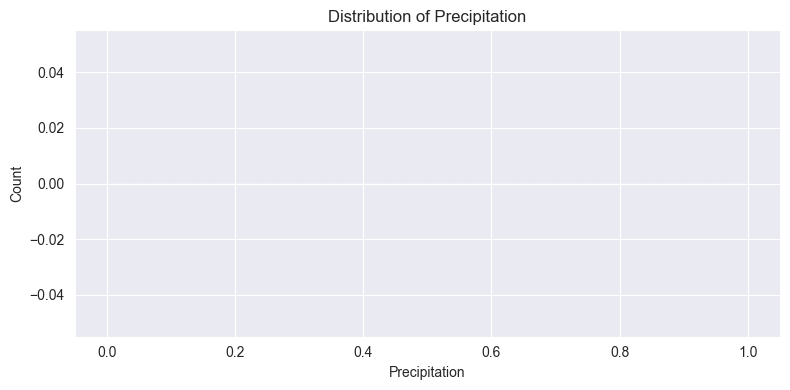

In [10]:
numeric_cols = [
    "AccidentCount",
    "AverageSeverity",
    "HighSeverityFlag",
    "Temperature",
    "Precipitation",
]

for col in numeric_cols:
    if col in df.columns:
        plt.figure()
        sns.histplot(df[col], bins=30, kde=False)
        plt.title(f"Distribution of {col}")
        plt.tight_layout()
        plt.show()



In [11]:
city_stats = (
    df.groupby(["City", "State"], as_index=False)
      .agg(
          TotalAccidents=("AccidentCount", "sum"),
          MeanDailyAccidents=("AccidentCount", "mean"),
          MeanSeverity=("AverageSeverity", "mean"),
      )
      .sort_values("TotalAccidents", ascending=False)
)

city_stats.head(10)


,City,State,TotalAccidents,MeanDailyAccidents,MeanSeverity
3,Houston,TX,41373,74.951087,2.177480
9,Los Angeles,CA,41089,64.503925,2.290226
0,Charlotte,NC,27477,54.735060,2.071944
13,Phoenix,AZ,9434,18.142308,2.216673
5,Jacksonville,FL,8747,17.320792,2.294121
1,Chicago,IL,8218,15.623574,2.738336
15,Seattle,WA,7971,14.545620,2.284657
12,Philadelphia,PA,5350,8.916667,2.349445
4,Indianapolis,IN,5239,10.394841,2.347621
10,New York,NY,4228,7.190476,2.273936


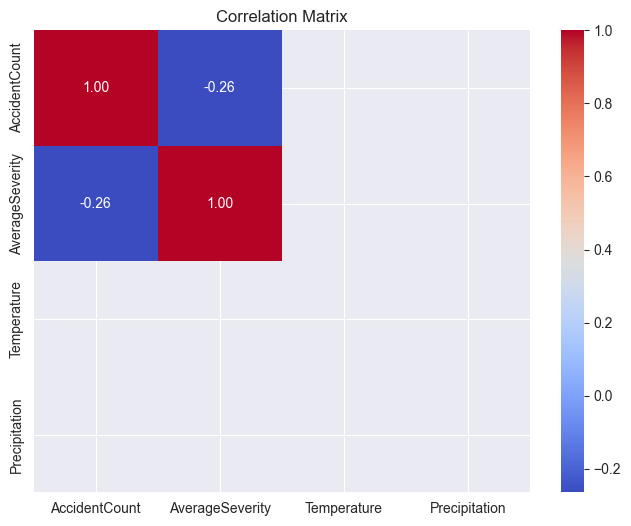

In [7]:
num_cols = [
    "AccidentCount",
    "AverageSeverity",
    "AccidentsPer100k",
    "Temperature", "Precipitation", "Snow",
    "WindSpeed", "Visibility",
]

num_cols = [c for c in num_cols if c in df.columns]
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()


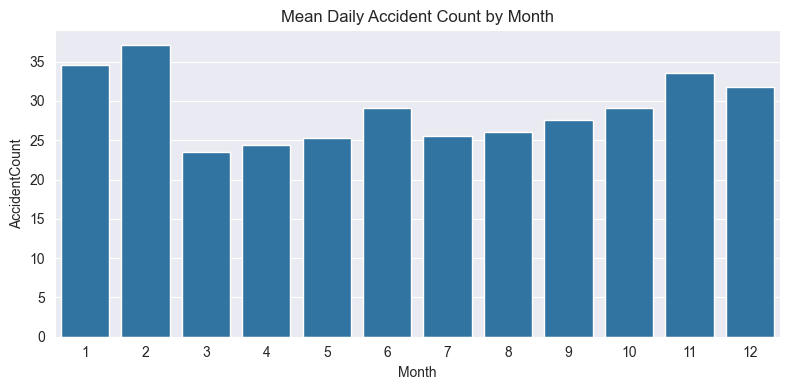

In [12]:
acc_by_month = (
    df.groupby("Month", as_index=False)["AccidentCount"]
      .mean()
      .sort_values("Month")
)

sns.barplot(data=acc_by_month, x="Month", y="AccidentCount")
plt.title("Mean Daily Accident Count by Month")
plt.tight_layout()
plt.show()


In [13]:
df.groupby("is_weekend")["AccidentCount"].agg(["mean", "median", "count"])


,mean,median,count
is_weekend,,,
0,32.755167,18.0,4113
1,17.334278,9.0,1412


In [14]:
df.groupby("Is_Holiday")["AccidentCount"].agg(["mean", "median", "count"])


,mean,median,count
Is_Holiday,,,
0,29.144958,15.5,5236
1,22.820069,11.0,289


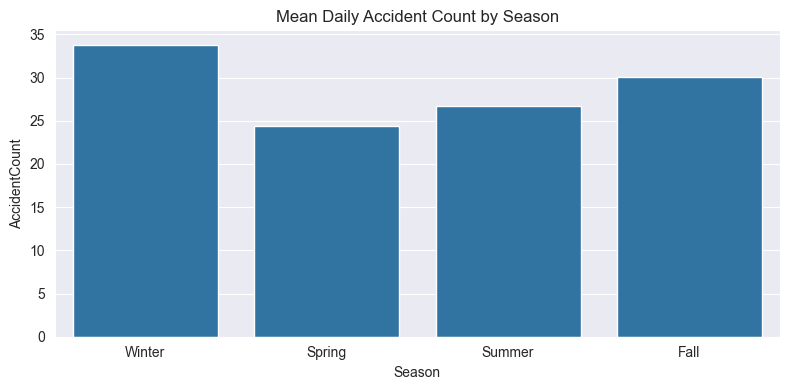

In [15]:
acc_by_season = (
    df.groupby("Season", as_index=False)["AccidentCount"].mean()
)

sns.barplot(data=acc_by_season, x="Season", y="AccidentCount",
            order=["Winter", "Spring", "Summer", "Fall"])
plt.title("Mean Daily Accident Count by Season")
plt.tight_layout()
plt.show()


Weather Segmentation (Clear vs Rainy)

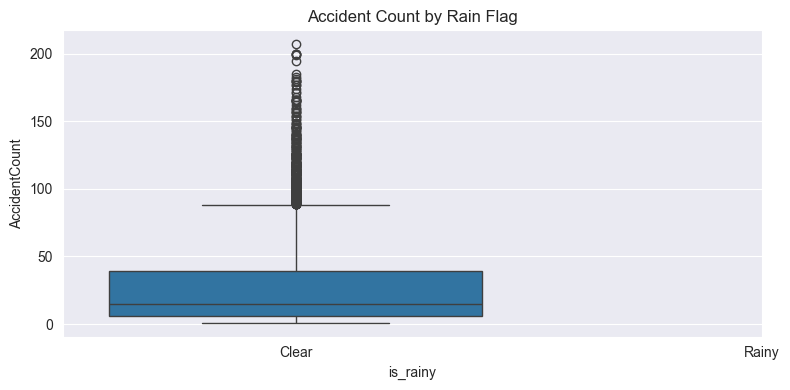

In [18]:
if "is_rainy" in df.columns:
    plt.figure()
    sns.boxplot(data=df, x="is_rainy", y="AccidentCount")
    plt.xticks([0, 1], ["Clear", "Rainy"])
    plt.title("Accident Count by Rain Flag")
    plt.tight_layout()
    plt.show()


Correlation Heatmap

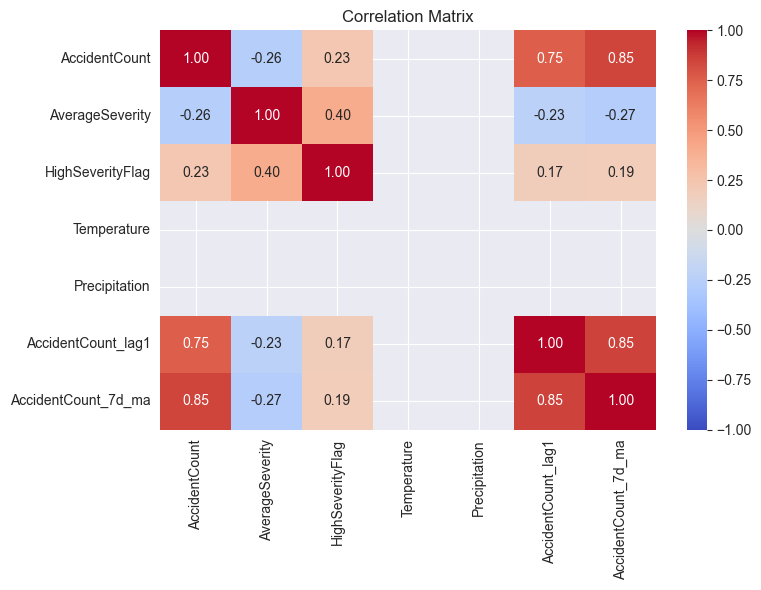

In [19]:
candidate_cols = [
    "AccidentCount",
    "AverageSeverity",
    "HighSeverityFlag",
    "Temperature",
    "Precipitation",
    "AccidentCount_lag1",
    "AccidentCount_7d_ma",
]

num_cols = [c for c in candidate_cols if c in df.columns]
corr = df[num_cols].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()
